# Clustering methods in scikit learn

https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

# Clustering objects and their scikit-learn method

fit(self, X[, y, sample_weight])	Compute k-means clustering.

get_params(self[, deep])		Get parameters for this estimator.

predict(self, X[, sample_weight])	Predict the closest cluster each sample in X belongs to.

score(self, X[, y, sample_weight])	Opposite of the value of X on the K-means objective.

set_params(self, \*\*params)		Set the parameters of this estimator.

transform(self, X)			Transform X to a cluster-distance space.

In [14]:
import pandas as pd
from sklearn import datasets

#Load features of diabetes dataset from sklearn datsets into a dataframe
diabetes= datasets.load_diabetes(return_X_y=False)
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

In [15]:
#remove blood serum features
df=df.drop(['s1','s2','s3','s4','s5','s6'],axis=1)

In [16]:
df.describe()

,age,sex,bmi,bp
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01


In [ ]:
#upgrade sklearn to most recent version
#!pip install --upgrade scikit-learn

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

print("Cluster labels: ",kmeans.labels_)
#kmeans.predict([[0, 0], [12, 3]])
print("Cluster centers: \n",kmeans.cluster_centers_)

#add cluster labels to dataset
df['kmeans_ID']=kmeans.labels_

Cluster labels:  [1 2 1 2 2 2 0 1 0 2 2 0 2 0 2 0 1 1 2 2 2 0 2 1 2 0 2 2 2 1 2 2 1 2 2 0 1
 2 1 0 0 2 0 2 1 0 2 2 0 0 2 1 2 1 2 2 2 2 2 0 2 0 0 2 0 0 0 0 0 2 2 1 0 0
 1 0 1 2 2 2 1 0 2 2 2 1 0 2 0 2 2 2 1 2 2 2 1 2 0 2 2 0 2 1 2 0 2 2 1 0 0
 2 2 1 1 0 1 1 0 2 2 1 1 0 2 0 2 0 2 2 1 2 0 0 2 2 2 1 1 1 1 2 1 2 0 1 0 2
 0 0 1 2 1 1 0 1 2 0 2 1 2 1 2 1 2 2 0 1 0 2 0 2 1 0 0 2 1 2 2 2 0 2 1 1 2
 0 0 2 1 2 2 0 0 0 2 0 2 1 2 2 2 0 1 1 1 2 0 1 1 1 2 1 1 2 2 1 1 1 2 2 0 2
 0 2 2 1 0 1 2 0 0 2 0 2 1 1 1 2 1 2 1 0 0 0 0 2 2 2 1 1 1 1 2 1 1 2 2 0 0
 2 2 1 1 0 0 0 0 2 1 2 1 1 2 1 2 0 1 2 0 0 1 0 2 2 0 2 2 2 0 0 1 1 2 2 0 0
 2 2 0 0 2 0 1 1 0 0 0 0 2 0 1 2 2 1 2 2 0 1 1 1 2 1 1 1 2 2 0 1 2 0 1 0 1
 0 0 2 2 1 2 2 1 1 1 1 2 0 1 0 2 0 1 0 0 2 0 0 0 0 2 1 1 1 1 0 0 2 1 1 0 2
 2 1 0 2 2 1 2 0 0 2 1 0 2 0 0 0 2 2 1 0 1 2 0 2 1 2 0 2 2 1 1 2 0 2 1 1 2
 2 1 0 0 2 1 2 0 2 1 2 2 2 2 1 1 0 0 2 0 0 1 2 2 0 2 2 2 2 2 1 0 0 2 2]
Cluster centers: 
 [[-0.00342309  0.05068012 -0.01539185 -0.01152196]
 [ 0.02957115  0

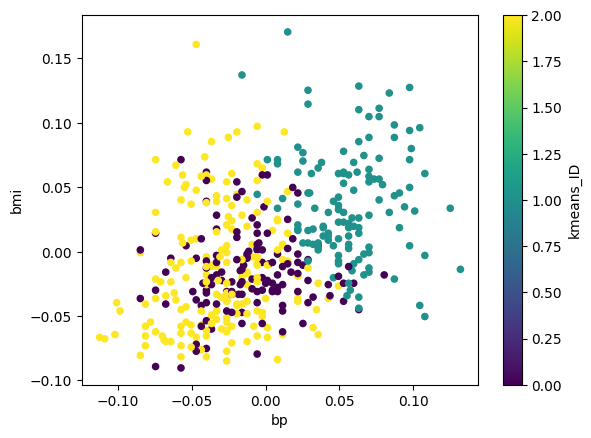

In [18]:
ax1=df.plot.scatter('bp', 'bmi', c='kmeans_ID',colormap='viridis')

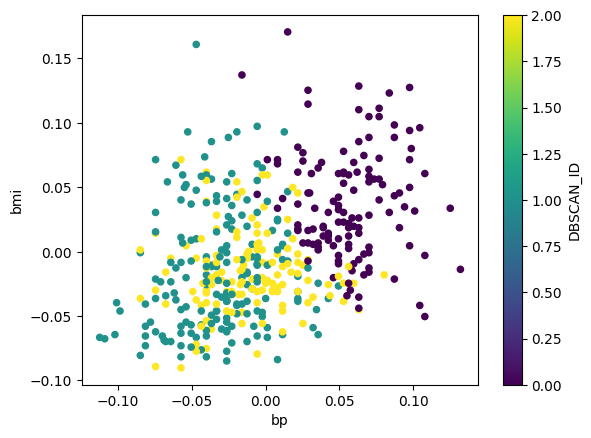

In [19]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(df)
#add cluster labels to dataset
df['DBSCAN_ID']=clustering.labels_

ax1 = df.plot.scatter('bp', 'bmi', c='DBSCAN_ID',colormap='viridis')

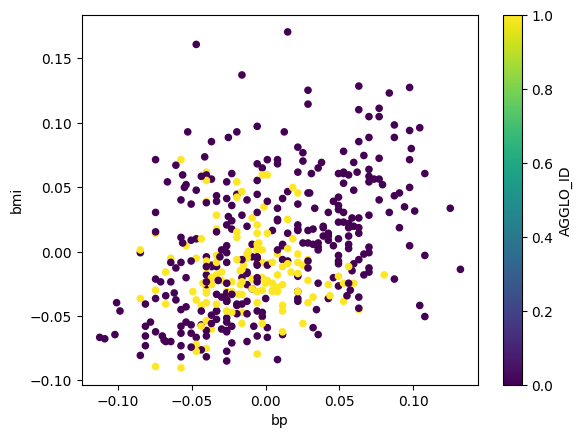

In [20]:
#Agglomerative Clustering is the bottom up form of Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
    
clustering = AgglomerativeClustering().fit(df)

#add cluster labels to dataset
df['AGGLO_ID']=clustering.labels_

ax1 = df.plot.scatter('bp', 'bmi', c='AGGLO_ID',colormap='viridis')

In [21]:
#create a copy of df without the cluster labels
df2=df.drop(['kmeans_ID','DBSCAN_ID','AGGLO_ID'],axis=1)
df2

,age,sex,bmi,bp
0,0.038076,0.050680,0.061696,0.021872
1,-0.001882,-0.044642,-0.051474,-0.026328
2,0.085299,0.050680,0.044451,-0.005670
3,-0.089063,-0.044642,-0.011595,-0.036656
4,0.005383,-0.044642,-0.036385,0.021872
...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744
438,-0.005515,0.050680,-0.015906,-0.067642
439,0.041708,0.050680,-0.015906,0.017293
440,-0.045472,-0.044642,0.039062,0.001215


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2']) # Methode um Datensatz von N Dimension in zwei Dimension 

principalDf


,PC1,PC2
0,0.081600,0.007422
1,-0.059241,-0.003369
2,0.079386,0.026598
3,-0.088558,-0.035452
4,-0.018741,-0.017284
...,...,...
437,0.085698,0.026906
438,-0.032948,0.057784
439,0.042128,0.052629
440,-0.018926,-0.063813


In [23]:
#concat principalDf with df
df = pd.concat([principalDf, df], axis = 1)
df

,PC1,PC2,age,sex,bmi,bp,kmeans_ID,DBSCAN_ID,AGGLO_ID
0,0.081600,0.007422,0.038076,0.050680,0.061696,0.021872,1,0,0
1,-0.059241,-0.003369,-0.001882,-0.044642,-0.051474,-0.026328,2,1,0
2,0.079386,0.026598,0.085299,0.050680,0.044451,-0.005670,1,0,0
3,-0.088558,-0.035452,-0.089063,-0.044642,-0.011595,-0.036656,2,1,0
4,-0.018741,-0.017284,0.005383,-0.044642,-0.036385,0.021872,2,1,0
...,...,...,...,...,...,...,...,...,...
437,0.085698,0.026906,0.041708,0.050680,0.019662,0.059744,1,0,0
438,-0.032948,0.057784,-0.005515,0.050680,-0.015906,-0.067642,0,2,1
439,0.042128,0.052629,0.041708,0.050680,-0.015906,0.017293,0,2,1
440,-0.018926,-0.063813,-0.045472,-0.044642,0.039062,0.001215,2,1,0


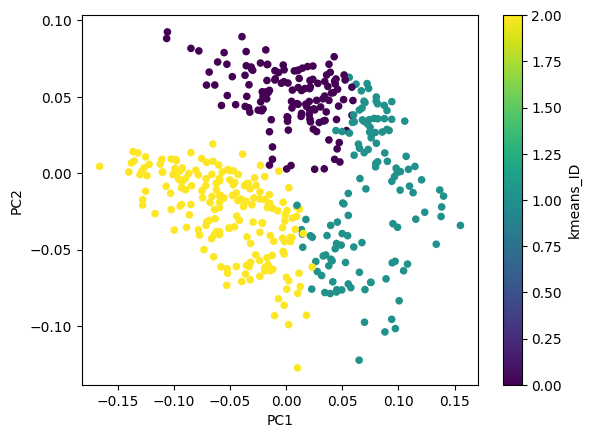

In [24]:
#now cluster the PCA transformed data
#kmeans = KMeans(n_clusters=3, random_state=0).fit(principalDf)
#principalDf['kmeans_ID']=kmeans.labels_

ax1 = df.plot.scatter('PC1', 'PC2', c='kmeans_ID',colormap='viridis')


In [25]:
#calculate the silhouette score
from sklearn.metrics import silhouette_score
print('Silhouette Score K-Means:', round(silhouette_score(df, df['kmeans_ID']),5))

#calculate the silhouette score for DBSCAN
print('Silhouette Score DBSCAN:', round(silhouette_score(df, df['DBSCAN_ID']),5))

#calculate the silhouette score for Agglomerative Clustering
print('Silhouette Score Agglomerative Clustering:', round(silhouette_score(df, df['AGGLO_ID']),5))

Silhouette Score K-Means: 0.9302
Silhouette Score DBSCAN: 0.9302
Silhouette Score Agglomerative Clustering: 0.773
